In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [134]:
# Directory containing the data files
directory = './GM12878'

In [135]:
# Function to load a single file into a contact matrix
def load_contact_matrix(filepath):
    data = pd.read_csv(filepath, sep='\t', header=None)
    data.columns = ['chr1', 'pos1', 'chr2', 'pos2', 'interaction']
    data = data[data['chr1'] == data['chr2']]
    max_pos = max(data['pos1'].max(), data['pos2'].max())
    min_pos = min(data['pos1'].min(), data['pos2'].min())
    bins = np.linspace(min_pos, max_pos, num=201)
    data['pos1_bin'] = pd.cut(data['pos1'], bins, labels=False, include_lowest=True)
    data['pos2_bin'] = pd.cut(data['pos2'], bins, labels=False, include_lowest=True)
    pivot_table = data.groupby(['pos1_bin', 'pos2_bin'])['interaction'].sum().unstack(fill_value=0)
    return pivot_table.to_numpy()

In [136]:
# Load all contact matrices into a list
contact_matrices = []
filepaths = []

In [137]:
# Load in the contact matrices from txt files
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory, filename)
        contact_matrices.append(load_contact_matrix(filepath))
        filepaths.append(filepath)


num_matrices = len(contact_matrices)

# Target dimension
target_dim = (200, 200)

# Function to extend matrix to the target dimension
def extend_matrix(matrix, target_dim):
    extended_matrix = np.zeros(target_dim)
    rows, cols = matrix.shape
    extended_matrix[:rows, :cols] = matrix
    return extended_matrix

# Extend all matrices
contact_matrices = [extend_matrix(matrix, target_dim) for matrix in contact_matrices]

print(len(contact_matrices))

24


In [138]:
# for matrix in contact_matrices:
#     print(matrix.shape)
# Function to calculate the Frobenius norm between two matrices
def frobenius_norm(matrix1, matrix2):
    return np.linalg.norm(matrix1 - matrix2, 'fro')

# Calculate the Frobenius norm (distance) between the matrices
distance = frobenius_norm(contact_matrices[3], contact_matrices[0])

# Print the distance
print("Frobenius Norm (Distance) between the matrices:", distance)


Frobenius Norm (Distance) between the matrices: 244.0655649615488


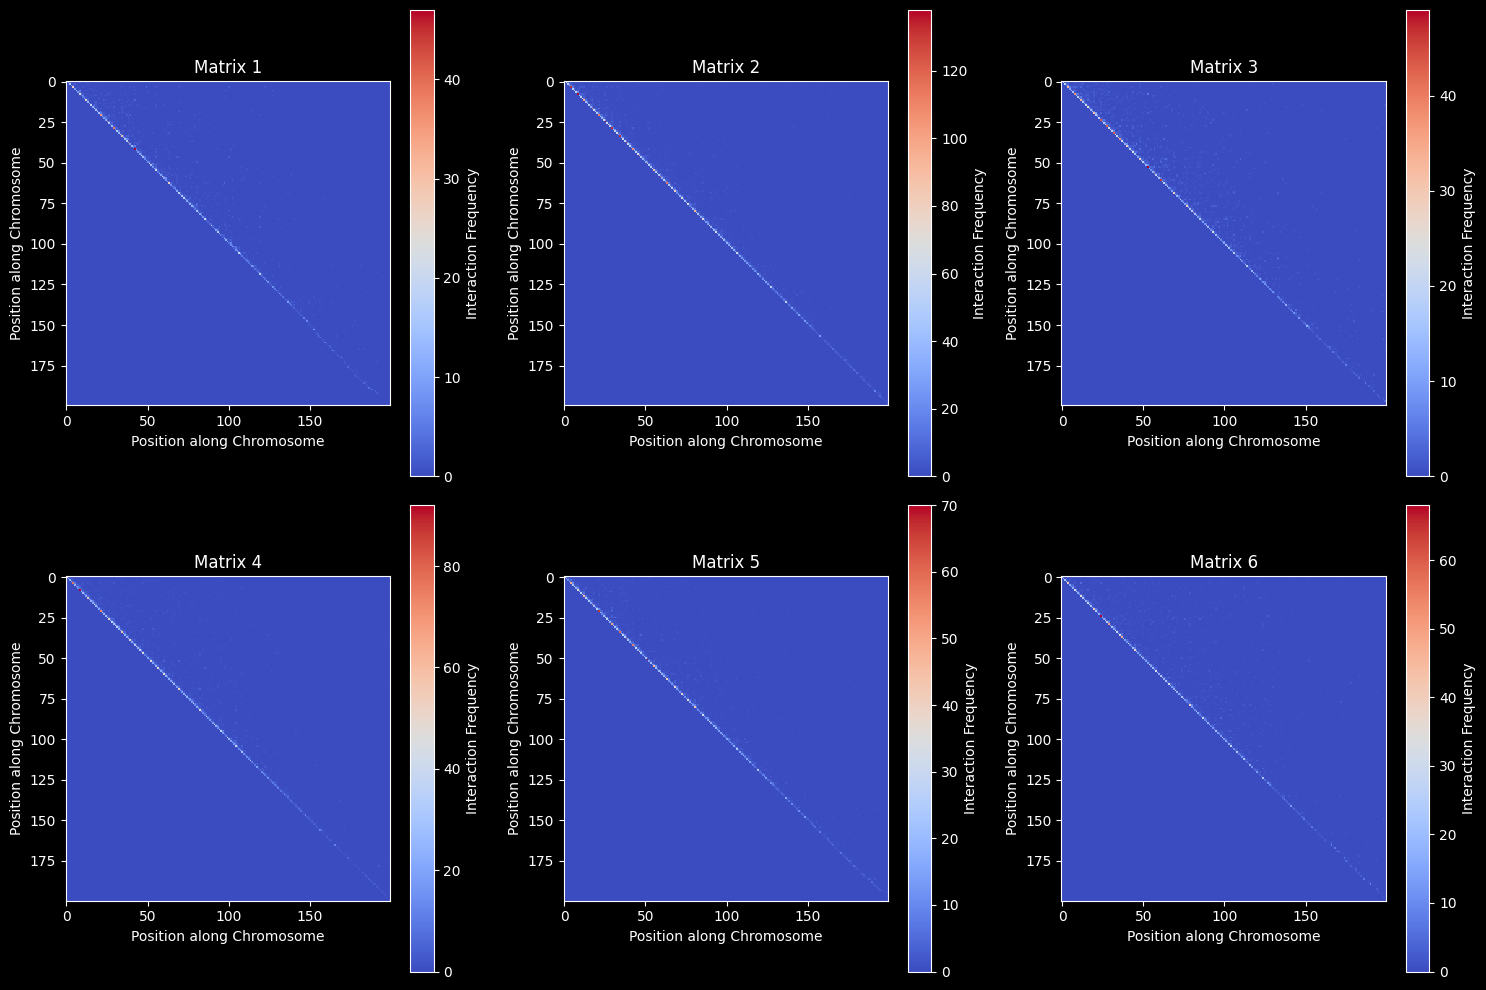

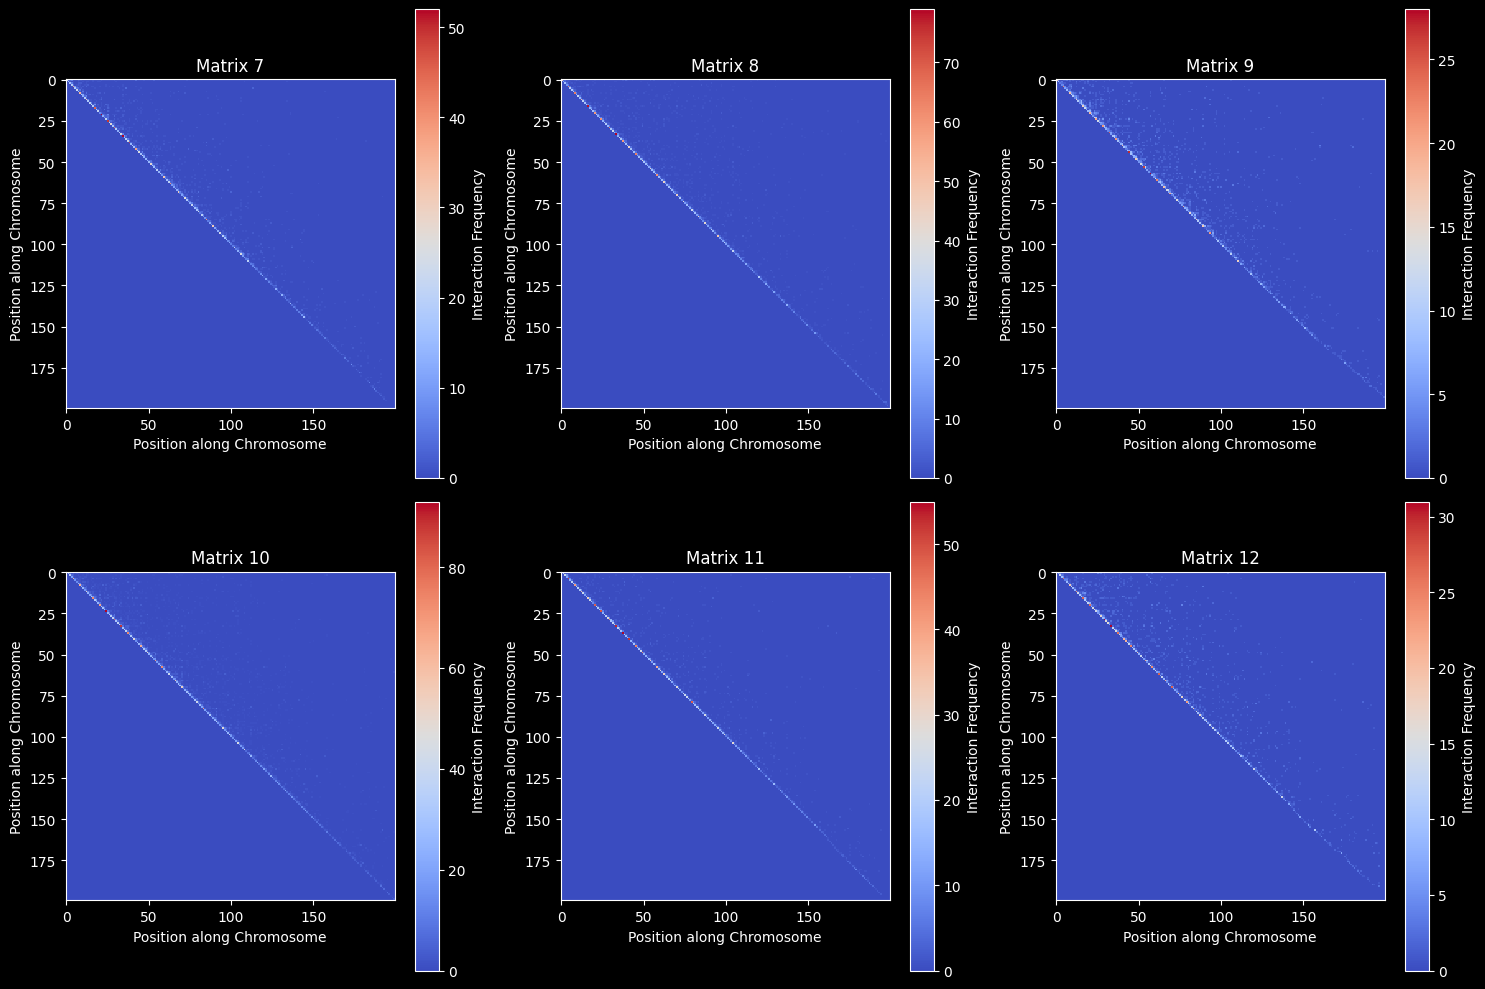

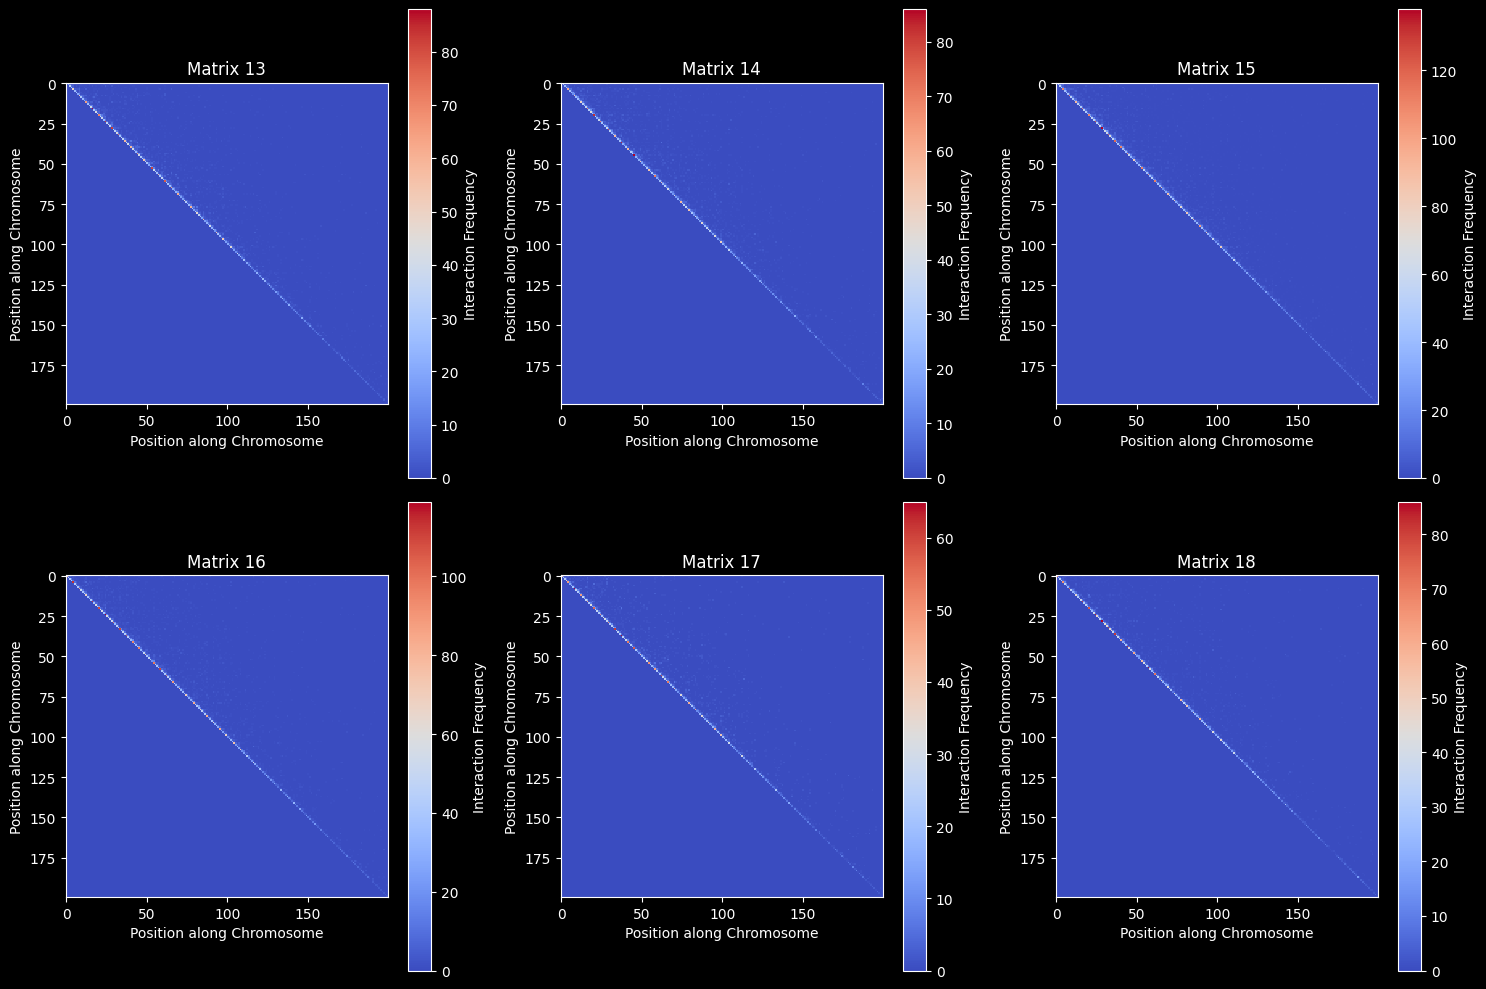

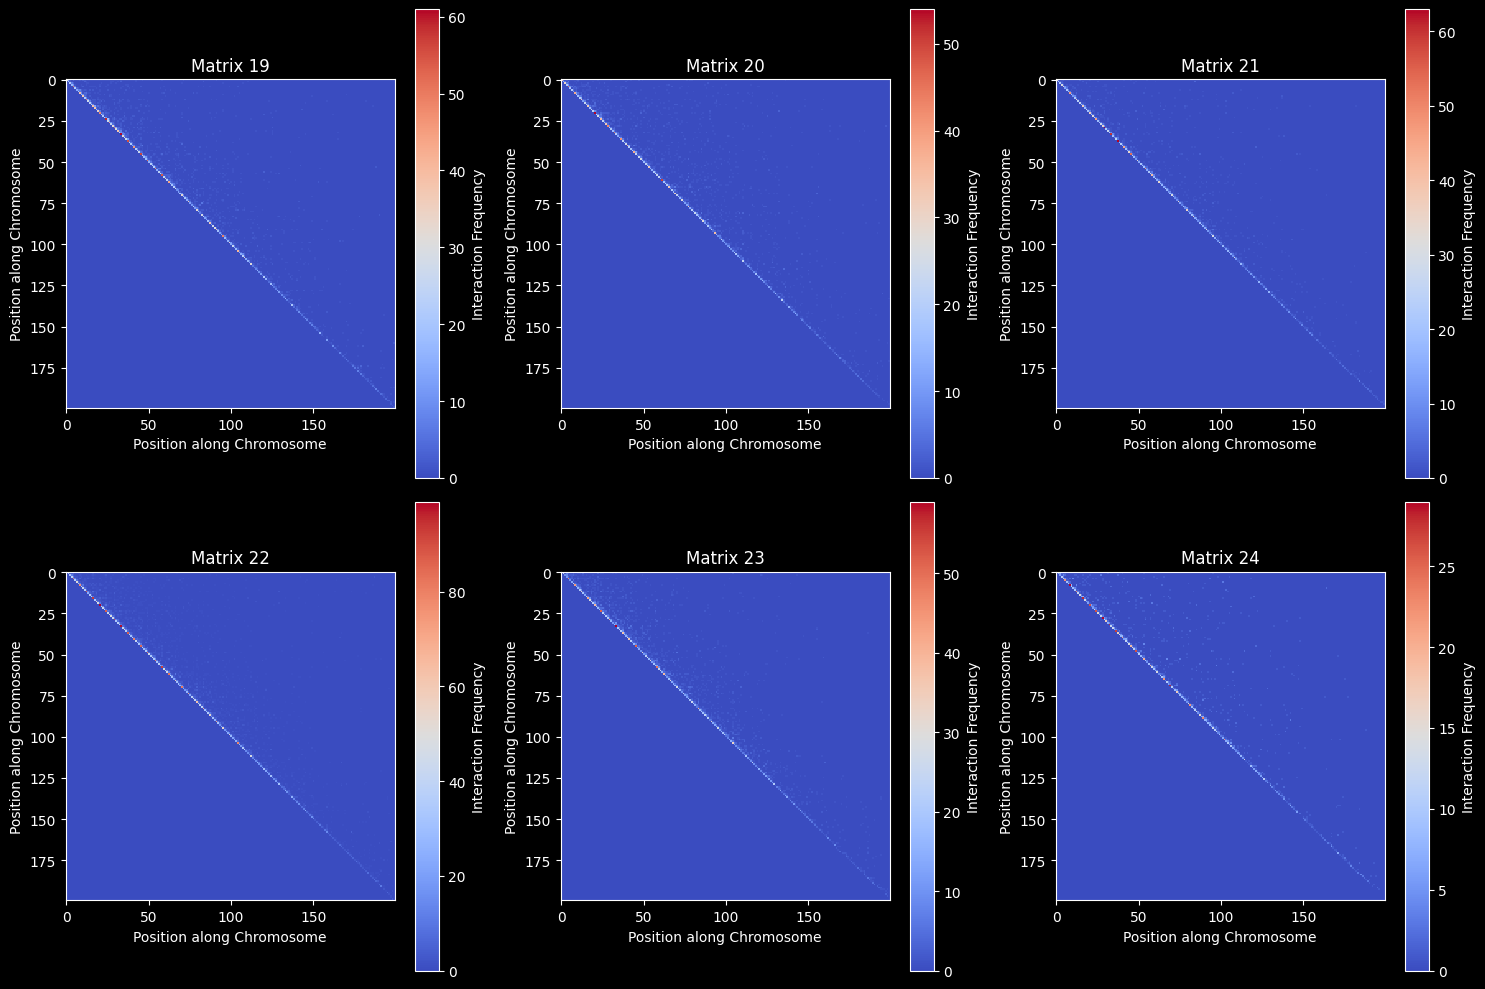

In [139]:
# Plot the matrices in batches of 6 per figure
num_matrices = len(contact_matrices)
matrices_per_figure = 6

for start in range(0, num_matrices, matrices_per_figure):
    end = min(start + matrices_per_figure, num_matrices)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        if start + i < end:
            matrix = contact_matrices[start + i]
            im = ax.imshow(matrix, cmap='coolwarm', interpolation='none')
            ax.set_title(f'Matrix {start + i + 1}')
            ax.set_xlabel('Position along Chromosome')
            ax.set_ylabel('Position along Chromosome')
            fig.colorbar(im, ax=ax, label='Interaction Frequency')
        else:
            fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()

In [132]:
# Initialize the distance matrix
distance_matrix = np.zeros((num_matrices, num_matrices))

# Compute the distances and store in the distance matrix
for i in range(num_matrices):
    for j in range(i, num_matrices):
        distance = frobenius_norm(contact_matrices[i], contact_matrices[j])
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

# Print the distance matrix
print("Distance Matrix:")
print(distance_matrix)

Distance Matrix:
[[  0.         546.5766186  149.79986649 244.06556496 157.55316563
  169.99117624 114.52947219 244.75702237 128.28483932 306.87293787
  174.89425376 121.51543112 326.52564983 297.41889651 570.58741662
  503.30110272 230.66209051 333.58357274 228.40971958 165.69852142
  188.01595677 426.20652271 175.48219283 118.35962149]
 [546.5766186    0.         530.70142265 447.35668096 428.10863107
  510.6162943  480.34258608 470.65061351 604.25905041 448.15064432
  513.83460374 582.28000137 412.71903276 445.62989128 391.07799734
  404.88516891 470.19464055 405.28508485 465.68766357 510.13919669
  498.95490778 393.9822331  504.04166494 584.04708714]
 [149.79986649 530.70142265   0.         223.99553567 193.
  156.13135495 158.04746123 212.14146224 133.21786667 262.60426501
  158.52444606 152.42047107 243.50564675 258.65420932 487.01745349
  456.13375231 199.95249436 249.33912649 197.87117021 106.38608932
  166.90715982 381.80361444 160.58642533 117.57976016]
 [244.06556496 447.356